In [1]:
# load dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [14]:
# load the diamonds dataset
df = sns.load_dataset("diamonds").dropna()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# selecting relevant numerical features for regression
X = df[['carat', 'depth', 'table', 'x', 'y', 'z']]  # numeric features
y = df['price']  # target variable

In [4]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# train decision tree regression model
dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)  # limit depth for better visualization
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [6]:
# make predictions
y_pred = dt_regressor.predict(X_test)

In [7]:
# evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mean squared error: {mse}')
print(f'r squared score: {r2}')


mean squared error: 1982618.298510833
r squared score: 0.8752820930530275


In [11]:
# creating arrays to parse the tree structure
n_nodes = dt_regressor.tree_.node_count
children_left = dt_regressor.tree_.children_left
children_right = dt_regressor.tree_.children_right
feature = dt_regressor.tree_.feature
threshold = dt_regressor.tree_.threshold

# parsing the tree structure
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # the seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # Exploring the test mode
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

In [12]:
print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))


The binary tree structure has 31 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.9950000047683716 else to node 16.
	node=1 test node: go to node 2 if X[:, 4] <= 5.5350000858306885 else to node 9.
		node=2 test node: go to node 3 if X[:, 0] <= 0.4650000035762787 else to node 6.
			node=3 test node: go to node 4 if X[:, 3] <= 4.625 else to node 5.
				node=4 leaf node.
				node=5 leaf node.
			node=6 test node: go to node 7 if X[:, 3] <= 5.244999885559082 else to node 8.
				node=7 leaf node.
				node=8 leaf node.
		node=9 test node: go to node 10 if X[:, 0] <= 0.8949999809265137 else to node 13.
			node=10 test node: go to node 11 if X[:, 4] <= 5.724999904632568 else to node 12.
				node=11 leaf node.
				node=12 leaf node.
			node=13 test node: go to node 14 if X[:, 4] <= 6.085000038146973 else to node 15.
				node=14 leaf node.
				node=15 leaf node.
	node=16 test node: go to node 17 if X[:, 4] <= 7.194999933242798 else to node 24.
		node=17 

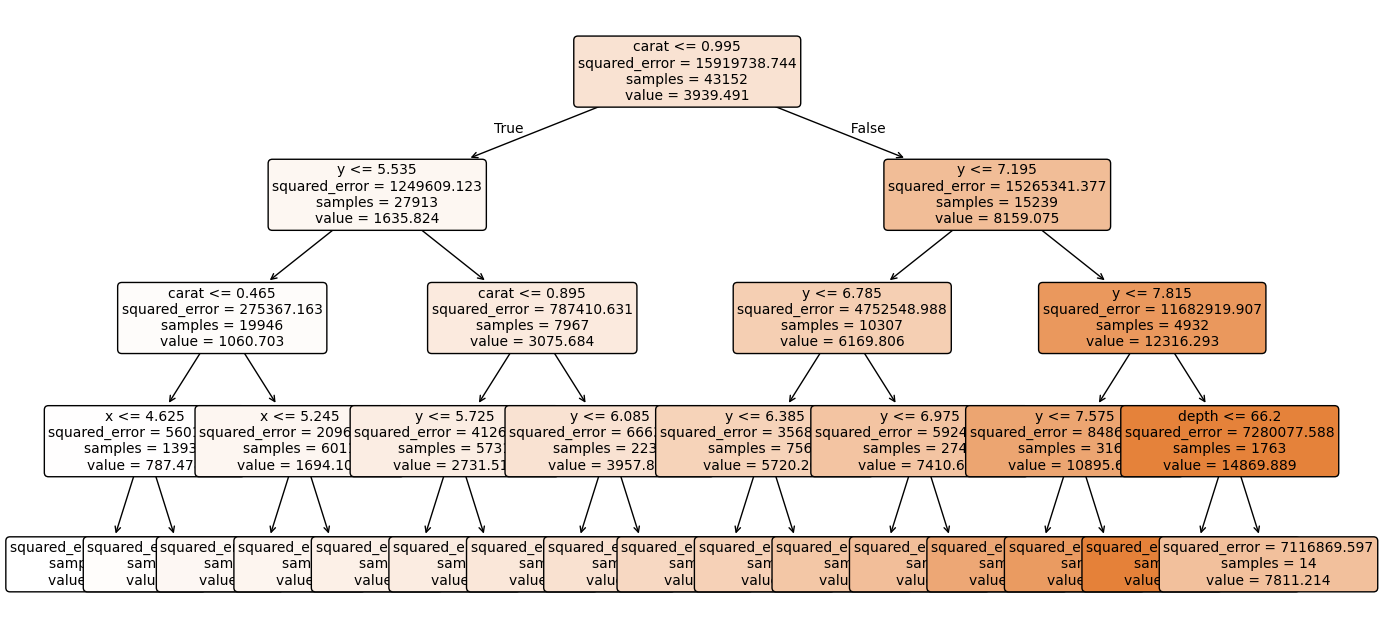

In [13]:
# visualize decision tree
plt.figure(figsize=(16, 8))
plot_tree(dt_regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()